In [1]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import json
import ast
import pyperclip
import re
import pickle
import streamlit as st
import requests
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
#from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score




In [2]:
email = pd.read_csv('/Users/anshulsingh/Desktop/MLProjects/Spam_Email/spam.csv', encoding='ISO-8859-1')
email

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
email.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [4]:
# drop last 3 cols
email.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
email

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
duplicates = email.duplicated()
duplicate_rows = email[duplicates]
duplicate_rows

,v1,v2
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [6]:
email = email.drop_duplicates()
email

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
email.rename(columns={'v1':'target','v2':'text'},inplace=True)
email.sample(5)

/var/folders/vb/ryn151ws71sc7z08spy69ltw0000gn/T/ipykernel_17792/2506439251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email.rename(columns={'v1':'target','v2':'text'},inplace=True)


,target,text
199,ham,"Found it, ENC &lt;#&gt; , where you at?"
884,ham,Yoyyooo u know how to change permissions for a...
4534,ham,IM LATE TELLMISS IM ON MY WAY
597,spam,You have an important customer service announc...
2278,ham,Hmm...Bad news...Hype park plaza $700 studio t...


In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
email['target'] = label_encoder.fit_transform(email['target'])


/var/folders/vb/ryn151ws71sc7z08spy69ltw0000gn/T/ipykernel_17792/2159502926.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email['target'] = label_encoder.fit_transform(email['target'])


In [9]:
#email.loc[:, 'target'] = email['target'].replace({'ham': 0, 'spam': 1})
email

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [10]:
email.loc[:, 'text'] = email['text'].str.lower()
email

,target,text
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...
5568,0,will ì_ b going to esplanade fr home?
5569,0,"pity, * was in mood for that. so...any other s..."
5570,0,the guy did some bitching but i acted like i'd...


In [11]:
email.loc[:, 'text'] = email['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
email

,target,text
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...
...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...
5568,0,will ì_ b going to esplanade fr home
5569,0,pity was in mood for that soany other suggest...
5570,0,the guy did some bitching but i acted like id ...


In [12]:
nltk.download('stopwords')
nltk.download('punkt')

# Function to remove stopwords from 'text' column
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

# Apply the function to the 'text' column
email.loc[:, 'text'] = email['text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anshulsingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anshulsingh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
email

,target,text
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor u c already say
4,0,nah dont think goes usf lives around though
...,...,...
5567,1,2nd time tried 2 contact u u å750 pound prize ...
5568,0,ì_ b going esplanade fr home
5569,0,pity mood soany suggestions
5570,0,guy bitching acted like id interested buying s...


In [14]:
porter = PorterStemmer()

# Function to apply stemming to 'text' column
def apply_stemming(text):
    words = word_tokenize(text)
    stemmed_words = [porter.stem(word) for word in words]
    return ' '.join(stemmed_words)

# Apply stemming to the 'text' column
email.loc[:, 'text']= email['text'].apply(apply_stemming)


In [15]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('caring')

'care'

In [16]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [17]:
spam_wc = wc.generate(email[email['target'] == 1]['text'].str.cat(sep=" "))
spam_wc

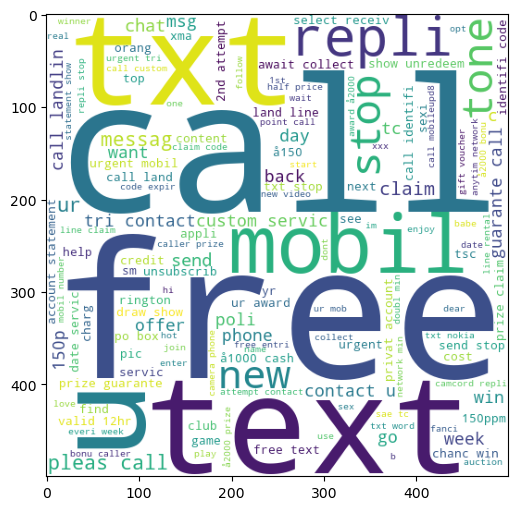

In [18]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [19]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(email['text']).toarray()

In [20]:
Y = email['target'].values

In [21]:
X.shape

(5169, 3000)

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

In [23]:
#mnb = MultinomialNB()


In [29]:
# Lgistic Regression
model = LogisticRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')


# Display classification report
print('\nClassification Report:')
print(classification_report(Y_test, Y_pred))

Accuracy: 0.96
Precision: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       903
           1       0.98      0.70      0.82       131

    accuracy                           0.96      1034
   macro avg       0.97      0.85      0.90      1034
weighted avg       0.96      0.96      0.96      1034



In [30]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.966142684401451


In [31]:
#SVC Model

svc_model = SVC(kernel='linear', C=1.0)

# Fit the model on the training data
svc_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = svc_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')


# Display classification report
print('\nClassification Report:')
print(classification_report(Y_test, Y_pred))

Accuracy: 0.99
Precision: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       903
           1       0.98      0.91      0.94       131

    accuracy                           0.99      1034
   macro avg       0.99      0.95      0.97      1034
weighted avg       0.99      0.99      0.99      1034



In [32]:
#KNN
knc = KNeighborsClassifier()
#Fit the model on the training data
knc.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = knc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')


# Display classification report
print('\nClassification Report:')
print(classification_report(Y_test, Y_pred))

Accuracy: 0.91
Precision: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       903
           1       1.00      0.32      0.49       131

    accuracy                           0.91      1034
   macro avg       0.96      0.66      0.72      1034
weighted avg       0.92      0.91      0.89      1034

